<a href="https://colab.research.google.com/github/Jahnavim12/DA/blob/main/laptoppricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd

In [177]:
df = pd.read_csv('/content/laptopData.csv')

In [178]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [179]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [180]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [181]:
dfna=df[df['Company'].isna()]

In [182]:
dfna.shape

(30, 11)

In [183]:
df.dropna(subset=['Company'], inplace=True) #to remove null rows

In [184]:
df.shape

(1273, 11)

In [185]:
avg=df["Price"].mean()

In [186]:
print(avg)

59955.81407321288


In [187]:
df.describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [188]:
q1=df['Price'].quantile(0.25)

In [189]:
print(q1)

31914.72


In [190]:
q3=df['Price'].quantile(0.75)

In [191]:
print(q3)

79333.3872


In [192]:
IQR=q3-q1

In [193]:
Lowerboundoutlier=q1-(1.5*IQR)
Upperboundoutlier=q3+(1.5*IQR)

In [194]:
print(Lowerboundoutlier)

-39213.28079999999


In [195]:
print(Upperboundoutlier)

150461.38799999998


In [196]:
df_outlier=df[df['Price']>Upperboundoutlier]

In [197]:
df_outlier.shape

(28, 11)

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

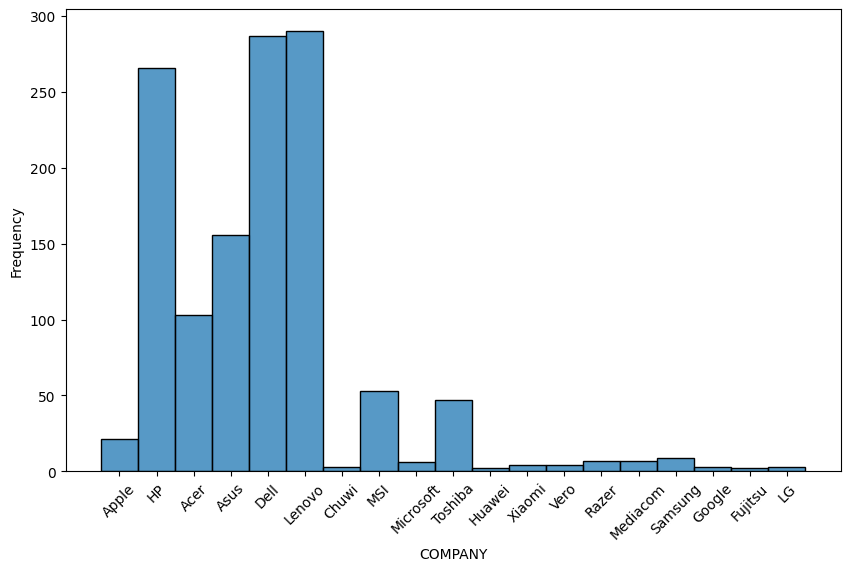

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Company'])
plt.xlabel('COMPANY')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

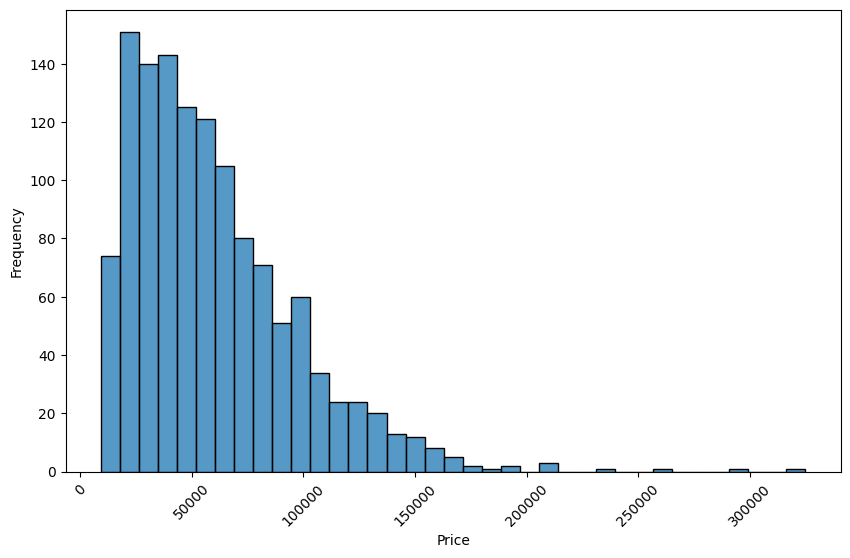

In [200]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'])
plt.xlabel('Price')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

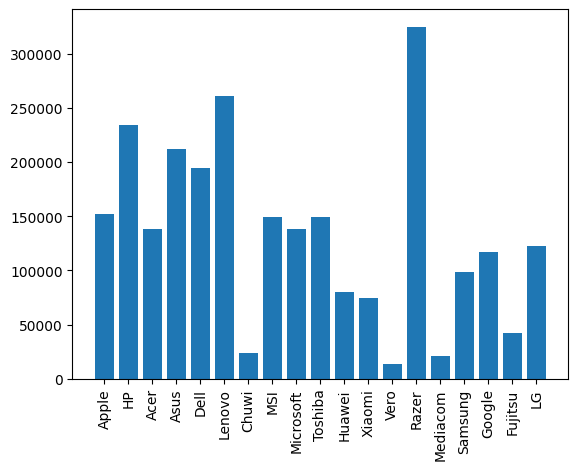

In [201]:
x=df['Company']
y=df['Price']
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

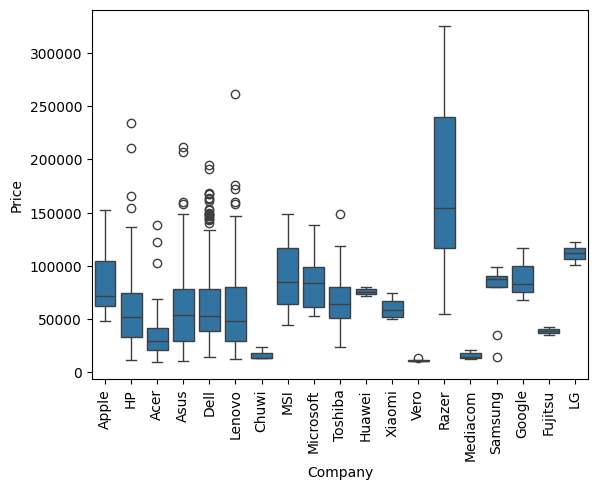

In [202]:
sns.boxplot(x='Company',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

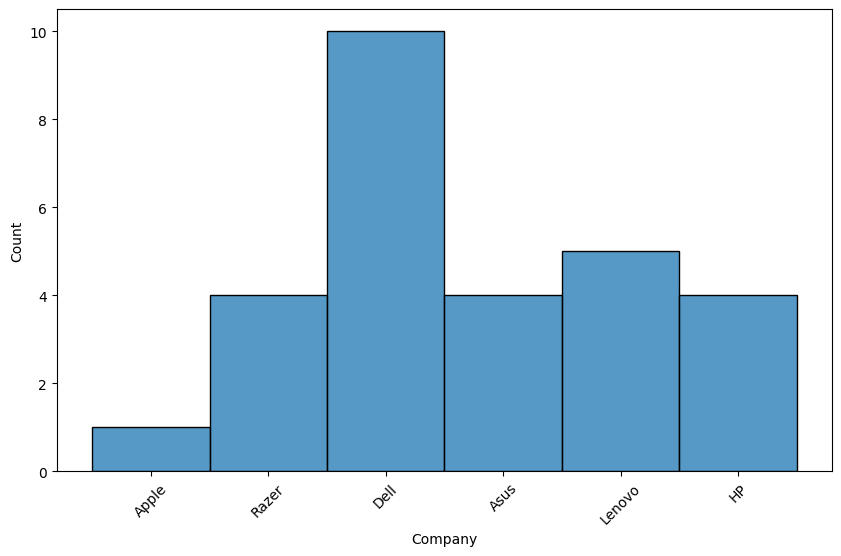

In [203]:
plt.figure(figsize=(10, 6))
sns.histplot(df_outlier['Company'])
plt.xticks(rotation=45)
plt.show()

In [204]:
df_budget=df[df['Price']<40000]

In [205]:
df_budget.shape

(454, 11)

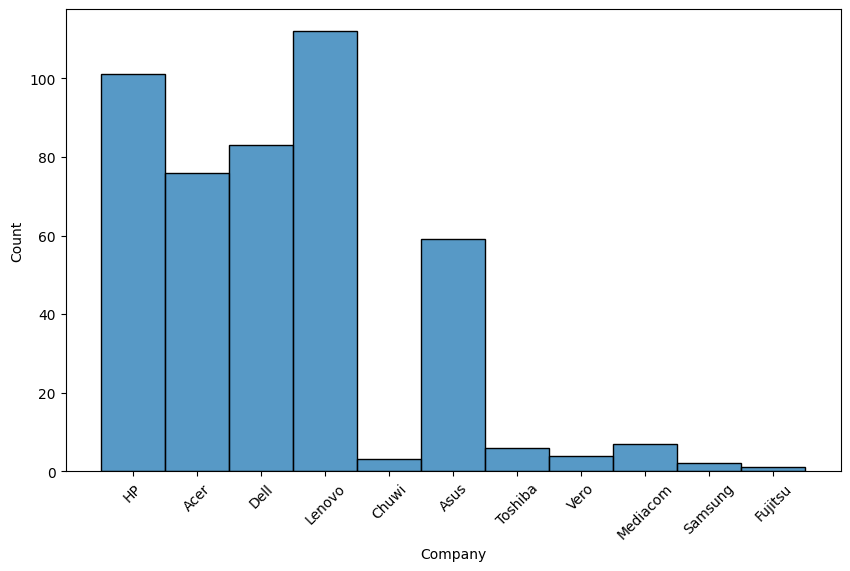

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(df_budget['Company'])
plt.xticks(rotation=45)
plt.show()

In [207]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)

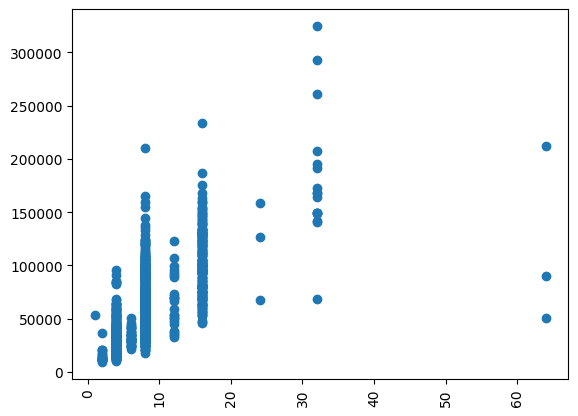

In [208]:
x=df['Ram']
y=df['Price']
plt.scatter(x,y)
plt.xticks(rotation=90)
plt.show()

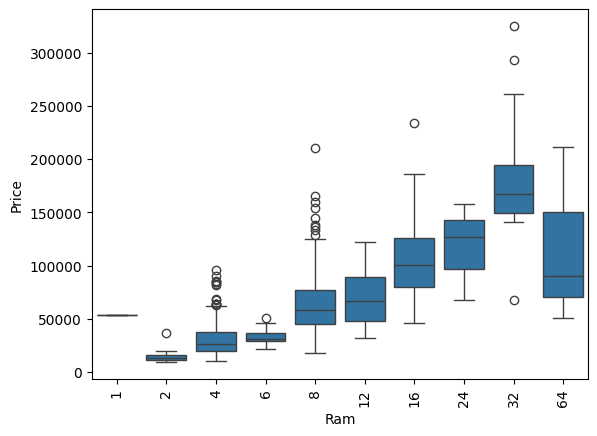

In [209]:
sns.boxplot(x='Ram',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

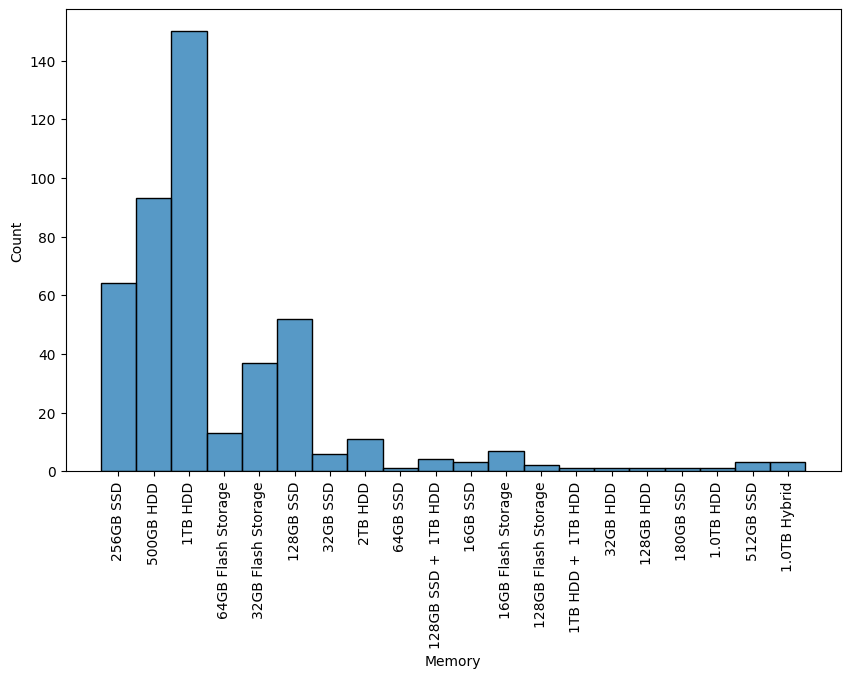

In [210]:
plt.figure(figsize=(10, 6))
sns.histplot(df_budget['Memory'])
plt.xticks(rotation=90)
plt.show()

In [211]:
SSD=[]
HDD=[]
FlashStorage=[]
Hybrid=[]
for i in df['Memory']:
  if 'SSD' in i:
    SSD.append(i)
  elif 'HDD' in i:
    HDD.append(i)
  elif 'Flash Storage' in i:
    FlashStorage.append(i)
  elif 'Hybrid' in i:
    Hybrid.append(i)

In [212]:

Memory_type=[]
for i in df['Memory']:
  if 'SSD' in i:
    Memory_type.append('SSD')
  elif 'HDD' in i:
    Memory_type.append('HDD')
  elif 'Flash Storage' in i:
    Memory_type.append('Flash Storage')
  elif 'Hybrid' in i:
    Memory_type.append('Hybrid')
  else:
    Memory_type.append('Other')
df['Memory_type']=Memory_type

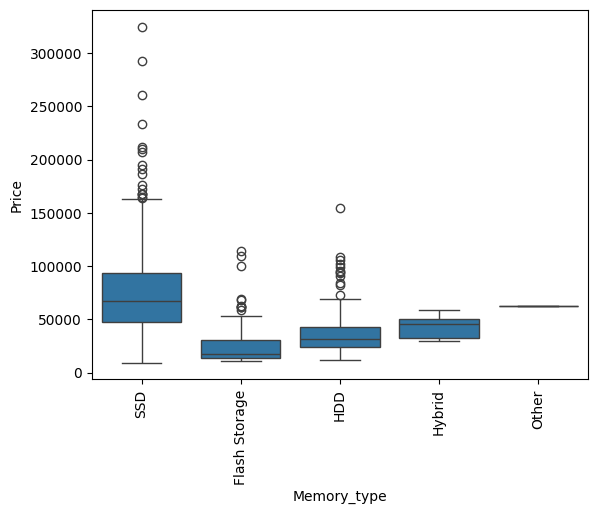

In [216]:
sns.boxplot(x='Memory_type',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()